In [1]:
library(dplyr) # data manipulation library

# library to steamline the machine learning model training process (Classification And REgression Training)
library(caret) 
library(sjPlot) # elbow method to find optimal k-val

library(class) # access the knn() function
library(FNN) # Fast Nearest Neighbor Search Algorithms and Applications

library(ISLR) # Introduction to Statistical Learning in R


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: ggplot2

Registered S3 methods overwritten by 'parameters':
  method                           from      
  as.double.parameters_kurtosis    datawizard
  as.double.parameters_skewness    datawizard
  as.double.parameters_smoothness  datawizard
  as.numeric.parameters_kurtosis   datawizard
  as.numeric.parameters_skewness   datawizard
  as.numeric.parameters_smoothness datawizard
  print.parameters_distribution    datawizard
  print.parameters_kurtosis        datawizard
  print.parameters_skewness        datawizard
  summary.parameters_kurtosis      datawizard
  summary.parameters_skewness      datawizard

Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages 

# Driving Question:
Can employment rates be forecasted using the aggregate COVID new_case_counts per county, summed over the past 90 days, and the Social Indices reported per county?
The KNNRegressor algorithm will test the predictive power associated with the above specified features in explaining U.S. county employment rates. 

# KNN
KNN is a supervised algorithm, which categorizes data using distance metrics. The algorithm handles non-linear data well, as it's able to discern non-linear boundaries between data of different categories.

The algorithm works by finding the k closest points to a new data point via the designated distance metric. With classification, the new data point is assigned the class seen most often in the data point's neighborhood. With regression, the average of the all the points in the new data point's neighborhood is returned as the prediction made by the model. The k-value herefore denotes the number of nearest neighbors to consider.

KNN regression
 - is a non-parametric method because it doesn't assume anything about the underlying data, i.e. parameters are unspecified.
 - is a lazy learning algorithm because it calculates and classifies data points as necessary and does not engage in a specialized training phase.

## import data and check data attributes (NAs, column data types, etc.)

In [5]:
ml_data <- read.csv('ml_predict_data.csv') # read data

In [14]:
arrange(ml_data, avg_perc_change) # order data by avg_perc_change


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




X,avg_perc_change,new_case_count_sum,religion,civic,charitable,fraternal,union,voteage,local,⋯,politicalacts,ethnic,ethnichpn,education,incomeequal,employ,genderincome,language,commu,nonelder
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Cocke County, Tennessee",-1.0000000,1920,0.16376655,0.04889999,0.1357341,0.1654275,0.4296296,0.6208026,0.17857471,⋯,0.1306241,0.8627942,0.931200700,0.5723014,0.3904110,0.3529412,0.0712016200,0.9720716,0.8282063,0.9991323
"Cassia County, Idaho",-0.9399091,428,0.13327720,0.03803333,0.3268698,0.2267658,0.4271605,0.3412767,0.17386015,⋯,0.2438316,0.7176911,0.279616900,0.6069246,0.4657534,0.5282584,0.0356842280,0.8139690,0.9053871,0.9989421
"Greene County, Arkansas",-0.8801477,2969,0.14461096,0.04889999,0.4833795,0.3029740,0.2419753,0.5672151,0.10907240,⋯,0.4499274,0.9286619,0.919125700,0.6670061,0.5388128,0.4913495,0.4159854700,0.9778182,0.7053746,0.9993511
"Upson County, Georgia",-0.8757159,1657,0.13236892,0.04889999,0.4390582,0.2565056,0.3333333,0.5815946,0.16422094,⋯,0.2568940,0.4286213,0.917548900,0.4501019,0.5342466,0.3575548,0.1163325900,0.9709418,0.7615363,0.9989581
"San Jacinto County, Texas",-0.8501591,1288,0.07847258,0.07063332,0.5692521,0.4275093,0.3308642,0.5553232,0.17791897,⋯,0.2351234,0.6556162,0.647433400,0.5386965,0.4680365,0.3679354,0.0003680587,0.9275118,0.7831324,0.9987093
"Rush County, Indiana",-0.8481364,483,0.16866842,0.04889999,0.2437673,0.2602231,0.3654321,0.5757605,0.15527175,⋯,0.2728592,0.9299319,0.962337730,0.5050917,0.6004566,0.5040369,0.1191138000,0.9675208,0.8960626,0.9983261
"Howell County, Missouri",-0.8152273,1944,0.13916771,0.04889999,0.5180056,0.3252788,0.4222222,0.5660249,0.12759285,⋯,0.3976778,0.9201547,0.929949050,0.6456212,0.5273973,0.4625144,0.0799056300,0.9662296,0.8356037,0.9992260
"Colbert County, Alabama",-0.8024886,1936,0.15907682,0.06519999,0.2880887,0.2713755,0.3308642,0.6142046,0.18445593,⋯,0.2235123,0.5912497,0.922158540,0.5814664,0.4794521,0.4521338,0.2414003000,0.9728736,0.9124165,0.9994222
"Clay County, Minnesota",-0.7764205,1647,0.06197579,0.09236666,0.4058172,0.2676580,0.3604938,0.5947285,0.15716317,⋯,0.4746009,0.8277901,0.858273570,0.7515275,0.5502283,0.6632065,0.0229724650,0.9379075,0.8852823,0.9996214


In [4]:
# assign countyname col to ml_data idx
row.names(ml_data) <- ml_data$X
# drop X col
drops <- c('X')
ml_data <- ml_data[, !(names(ml_data) %in% drops)]

In [5]:
# check for missing data
ml_data[!complete.cases(ml_data),]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


avg_perc_change,new_case_count_sum,religion,civic,charitable,fraternal,union,voteage,local,state,⋯,politicalacts,ethnic,ethnichpn,education,incomeequal,employ,genderincome,language,commu,nonelder
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [6]:
# check columns classes
sapply(ml_data, class)

avg_perc_change new_case_count_sum           religion              civic 
         "numeric"          "integer"          "numeric"          "numeric" 
        charitable          fraternal              union            voteage 
         "numeric"          "numeric"          "numeric"          "numeric" 
             local              state            federal      politicalacts 
         "numeric"          "numeric"          "numeric"          "numeric" 
            ethnic          ethnichpn          education        incomeequal 
         "numeric"          "numeric"          "numeric"          "numeric" 
            employ       genderincome           language              commu 
         "numeric"          "numeric"          "numeric"          "numeric" 
          nonelder 
         "numeric"

## check target variable distribution

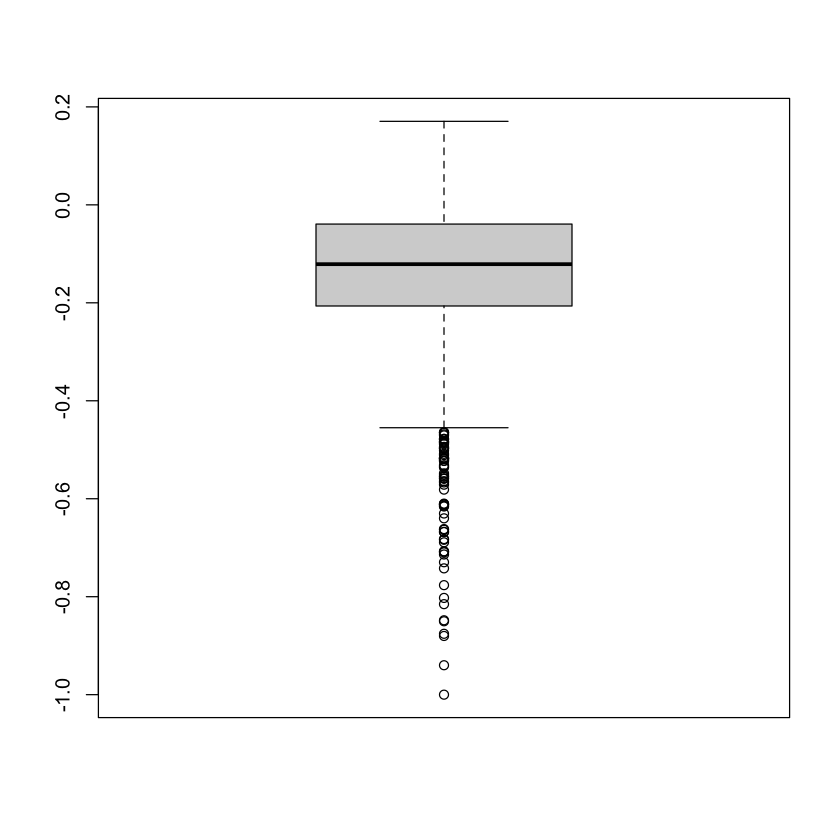

In [7]:
# check distribtuion of target variable
b <- boxplot(ml_data$avg_perc_change)

Most employment rates, aggregated over the past 90 days and reported per county, are negative, with a few outliers reporting very negative employment rates (x < -0.5).

## randomize, scale and split data to train & test sets

Because KNN is a distance-based algorithm, the algorithm's calculations are affected by the magnitude of the data. Therefore, it's important to ensure that all numeric data is measured on the same scale. Otherwise, the algorithm will be biased towards variables of a higher magnitude. Here, we normalize the variables by subtracting the mean from the observation, and then dividing by the standard deviation of that variable.

In [8]:
# function to scale X
normalize <- function(x) {
    return((x - min(x))/(max(x) - min(x)))
}

In [9]:
set.seed(1)
# create an index to split the data to 80% training and 20% test
index = round(nrow(ml_data)*0.2,digits=0)
# sample randomly throughout the dataset 
test.indices = sample(1:nrow(ml_data), index)
#80% training set
train = ml_data[-test.indices,] 
#20% test set
test = ml_data[test.indices,] 

# apply the normalize function to normalize the data
train_x_scaled = data.frame(lapply(train[, 2:21], normalize))
train_y = train[,2]

# apply the normalize function to normalize the data
test_x_scaled = data.frame(lapply(test[, 2:21], normalize))
test_y = test[,2]

## The best k-value
The k-value indicates the count of nearest neighbors. 

### The Elbow Method

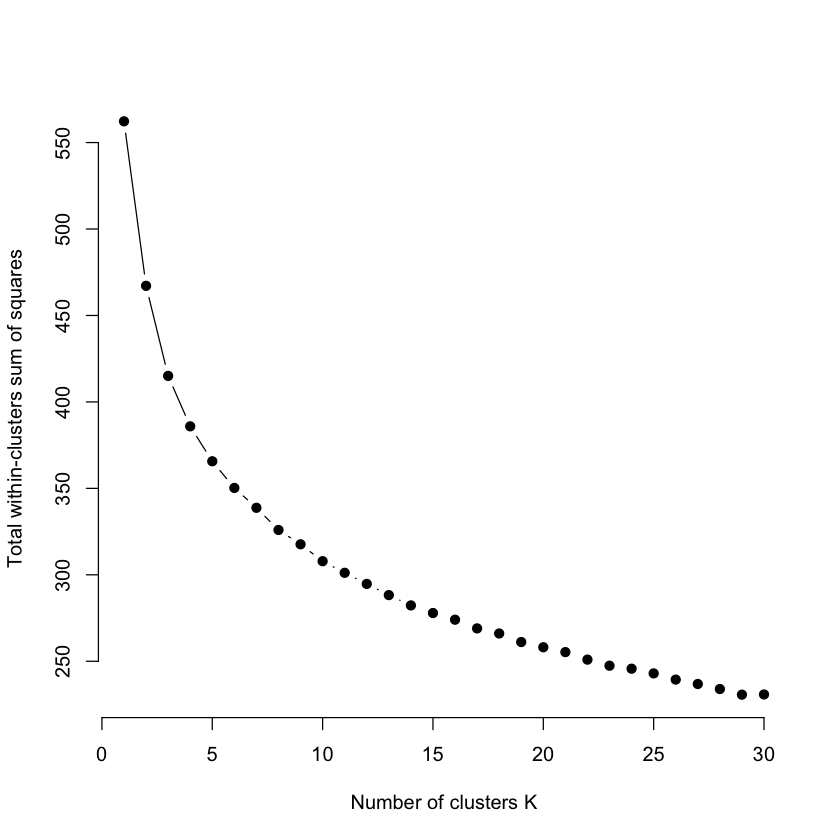

In [19]:
set.seed(1)
# plot the within-cluster sum of squares (wss) for k = 2 to k = 30
k.max <- 30
data <- rbind(train_x_scaled, test_x_scaled)
wss <- sapply(1:k.max, 
              function(k){
                  kmeans(data, k, nstart=5, iter.max=30)$tot.withinss
              })

plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

### using the caret package

In [20]:
# The tuneLength parameter 
# tells the algorithm to try different default values for the main parameter
set.seed(1)
ctrl <- trainControl(method = "repeatedcv", repeats = 2)
knnFit <- caret::train(avg_perc_change ~ ., 
                data = train, 
                method = "knn", 
                trControl = ctrl,
                preProcess = c("center", "scale"), 
                tuneLength = 10)
knnFit

k-Nearest Neighbors 

947 samples
 20 predictor

Pre-processing: centered (20), scaled (20) 
Resampling: Cross-Validated (10 fold, repeated 2 times) 
Summary of sample sizes: 854, 851, 853, 852, 853, 852, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared    MAE      
   5  0.1789501  0.03235133  0.1297390
   7  0.1733003  0.03976296  0.1249203
   9  0.1715256  0.03852065  0.1231777
  11  0.1690879  0.04859412  0.1216246
  13  0.1677229  0.05197411  0.1211286
  15  0.1669249  0.05762919  0.1206397
  17  0.1665055  0.05855529  0.1204732
  19  0.1658286  0.06185180  0.1195796
  21  0.1652498  0.06699059  0.1191978
  23  0.1648331  0.06863608  0.1187171

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 23.

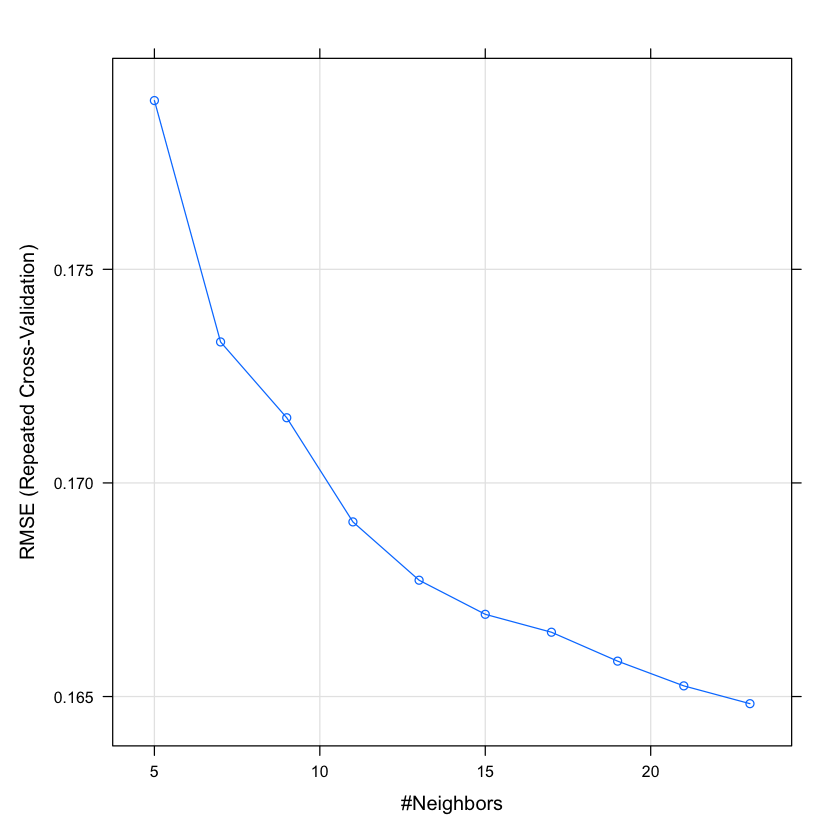

In [21]:
#Use plots to see optimal number of clusters:
#Plotting yields Number of Neighbours Vs accuracy (based on repeated cross validation)
plot(knnFit)

In [12]:
# # make predictions by specifying the optimal k-vale
# predictions <- knn(train=train_x_scaled, test=test_x_scaled, cl=train_y, k = 23)

In [14]:
# make predictions by specifying the optimal k-vale
reg_results <- knn.reg(as.data.frame(train_x_scaled), as.data.frame(test_x_scaled), train_y, k = 23)

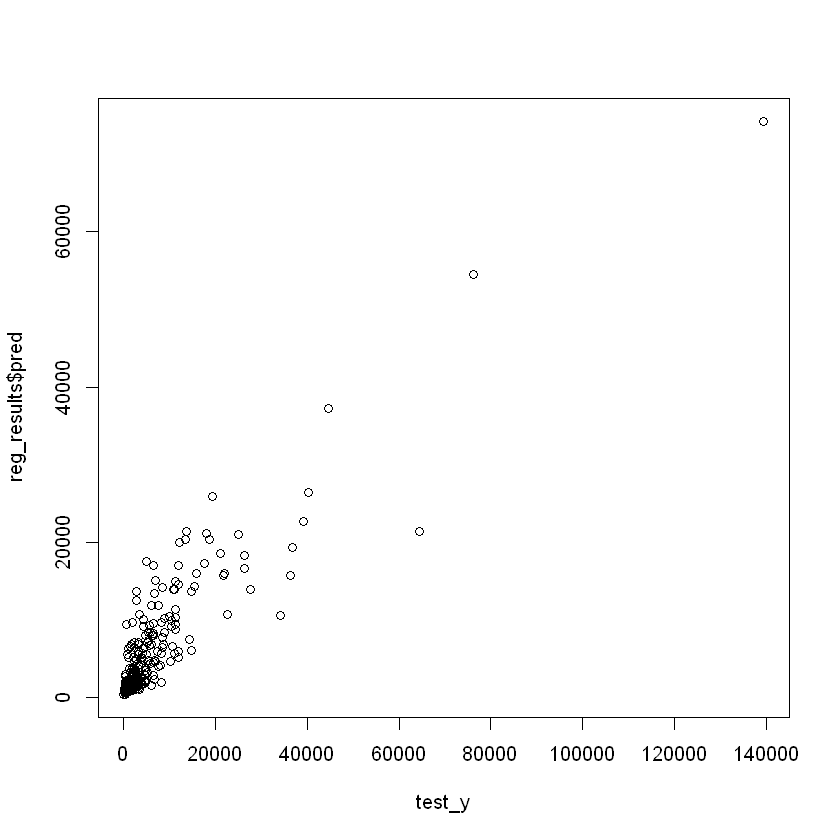

In [15]:
plot(test_y, reg_results$pred)

If the values were perfectly predicted, we would expect to see points along the y = x line (the lower-left to upper-right diagonal if the scales on each axis of the plot are the same). As the points closely align with this y = x line, it's clear the algorithm is performing well in predicting employment rates.

# RSME: 0.1647099
RMSE is the standard deviation of the the distance between the regression line and the data points, i.e. is a measure of how spread out these residuals are. The more spread out, the greater the distance between the data points and the regression line. This is an indicator of poor model performance.

# roc_auc_score for regression problems?
https://towardsdatascience.com/how-to-calculate-roc-auc-score-for-regression-models-c0be4fdf76bb

Thanks to Samuele Mazzanti's article, we are able to understand how our algorithm is performing in another way. 
Here, the roc_auc_score coincides with “the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one”. In other words, if we take any two observations a and b such that a > b, then roc_auc_score is equal to the probability that our model actually ranks a higher than b.

In [18]:
naive_roc_auc_score <- function(y_true, y_pred) {
    num_same_sign <- 0
    num_pairs <- 0 
    
    for(a in 1:length(y_true))
    {
        for(b in 1:length(y_true))
        {
            if (y_true[a] > y_true[b]) {
                
                num_pairs <- num_pairs + 1
                
                if (y_pred[a] > y_pred[b]) {
                
                    num_same_sign <- num_same_sign + 1
                }
                else if (y_pred[a] == y_pred[b]) {
                    
                    num_same_sign <- num_same_sign + .5
                }
            }
        }
    }
    num_same_sign / num_pairs
}

### The returned naive_roc_auc_score indicates an 81% chance that the county ranked as having a higher employment rate, actually has a higher employment rate. In other words, the model is able to discern which counties will see higher rates of employment 81% of the time.

In [19]:
naive_roc_auc_score(test_y, reg_results$pred)

[1] 0.8129381